In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
import pandas as pd

# Replace 'your_data.dta' with the path to your .dta file
df = pd.read_spss('data/caspian-5.sav', convert_categoricals=False)

In [3]:
df.drop(['closefriendn','spenttimefriend'],axis=1,inplace=True)

In [4]:
df.replace('', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)

/tmp/ipykernel_20304/3795248332.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('', np.nan, inplace=True)


In [5]:
girls_df = df[df['sex'] ==0]
boys_df = df[df['sex'] == 1]

In [6]:
corr_matrix_g=girls_df.corr().abs()
corr_matrix_b=boys_df.corr().abs()

In [7]:
upper_triangle_g = corr_matrix_g.where(np.triu(np.ones(corr_matrix_g.shape), k=1).astype(bool))

# Step 3: Find features with correlation greater than the threshold (e.g., 0.8)
threshold = 0.8
to_drop_g = [column for column in upper_triangle_g.columns if any(upper_triangle_g[column] > threshold)]



In [8]:
upper_triangle_b = corr_matrix_b.where(np.triu(np.ones(corr_matrix_b.shape), k=1).astype(bool))

# Step 3: Find features with correlation greater than the threshold (e.g., 0.8)
threshold = 0.8
to_drop_b = [column for column in upper_triangle_b.columns if any(upper_triangle_b[column] > threshold)]


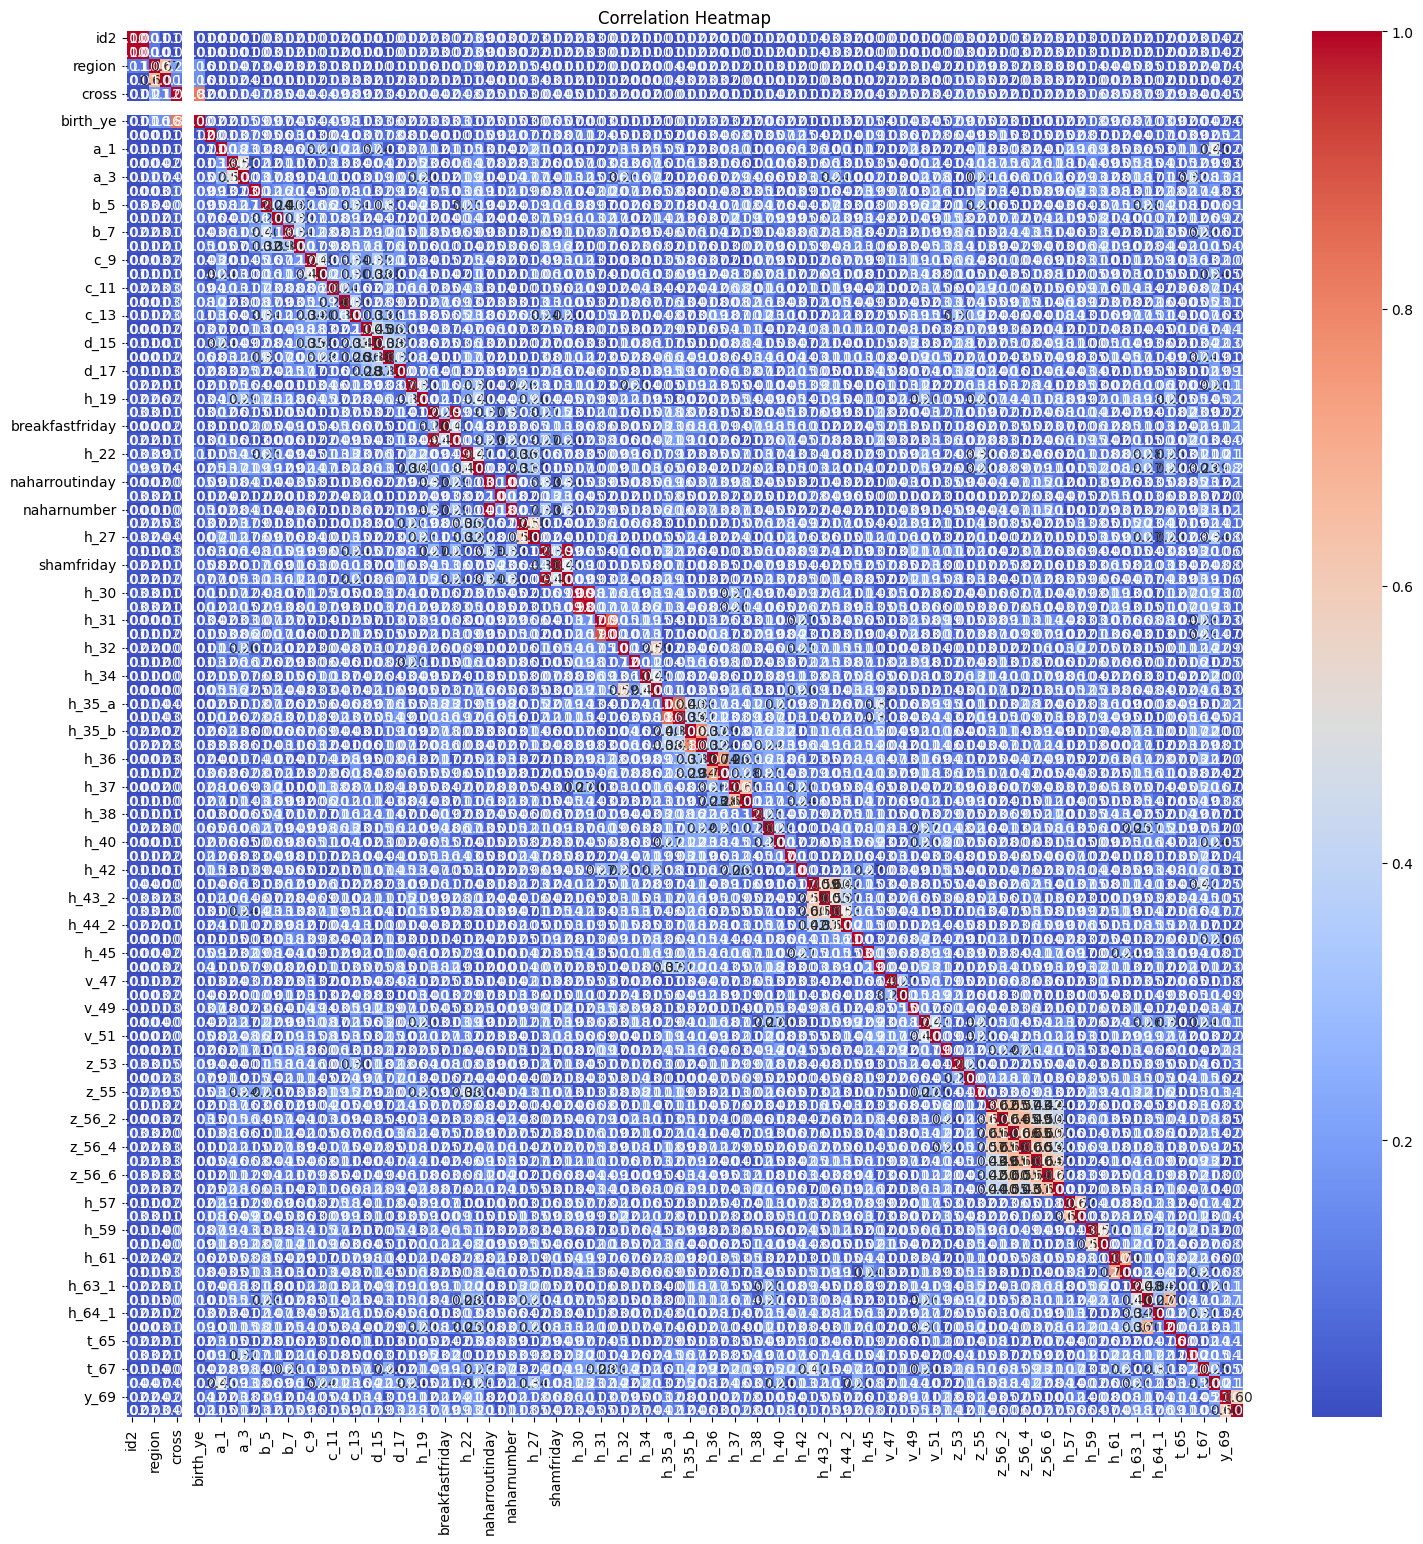

In [9]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix_g.iloc[:100,:100], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
to_keep = ['height_2','age']
# Remove all columns in to_drop except the one to keep
filtered_to_drop_g = [col for col in to_drop_g if col not in to_keep]
filtered_to_drop_b = [col for col in to_drop_b if col not in to_keep]


In [11]:
df_cleaned_girl= girls_df.drop(columns=filtered_to_drop_g)

In [12]:
df_cleaned_boy= boys_df.drop(columns=filtered_to_drop_b)


In [13]:
print("Original DataFrame:")
print(df.shape)
print("\nCleaned DataFrame:")
print(df_cleaned_boy.shape)

Original DataFrame:
(13983, 392)

Cleaned DataFrame:
(7085, 367)


In [14]:
missing_percent = df_cleaned_girl.isna().mean()

In [15]:
threshold = 0.8
df_cleaned_girl = df_cleaned_girl.loc[:, missing_percent <= threshold]

In [16]:
missing_percent = df_cleaned_boy.isna().mean()
threshold = 0.8
df_cleaned_boy = df_cleaned_boy.loc[:, missing_percent <= threshold]

In [17]:
for col in df_cleaned_girl.columns:
    df_cleaned_girl[col] = df_cleaned_girl[col].fillna(df_cleaned_girl[col].mode()[0])

print(df_cleaned_girl)

                id2  region  cluster  cross  sex  sample_c  a_1  a_2  a_3  \
0      1.121128e+09     1.0     21.0    1.0  0.0       8.0  3.0  1.0  1.0   
1      3.613623e+10     1.0     36.0    2.0  0.0       5.0  2.0  1.0  1.0   
5      9.124129e+09     1.0     24.0    1.0  0.0       2.0  4.0  1.0  1.0   
6      2.111513e+10     1.0     15.0    1.0  0.0       2.0  4.0  4.0  4.0   
7      1.312523e+10     1.0     25.0    2.0  0.0      10.0  3.0  3.0  3.0   
...             ...     ...      ...    ...  ...       ...  ...  ...  ...   
13969  2.512313e+10     1.0     23.0    1.0  0.0       2.0  4.0  1.0  1.0   
13970  5.313523e+10     1.0     35.0    2.0  0.0       9.0  3.0  1.0  1.0   
13974  4.711713e+10     1.0     17.0    1.0  0.0      10.0  4.0  1.0  1.0   
13976  5.112623e+10     1.0     26.0    2.0  0.0       2.0  4.0  1.0  1.0   
13981  5.313223e+10     1.0     32.0    2.0  0.0       8.0  3.0  1.0  1.0   

       a_4  ...  hp_97_1  hp_97_10  hp_97_2  hp_97_20  hp_98  parental  \
0

In [18]:
for col in df_cleaned_boy.columns:
    df_cleaned_boy[col] = df_cleaned_boy[col].fillna(df_cleaned_boy[col].mode()[0])

print(df_cleaned_boy)

                id2  region  cross  sex  sample_c  a_1  a_2  a_3  a_4  b_5  \
2      4.103118e+09     1.0    1.0  1.0       1.0  4.0  4.0  5.0  4.0  3.0   
3      5.011112e+10     1.0    1.0  1.0       2.0  4.0  1.0  1.0  1.0  1.0   
4      4.123522e+10     2.0    2.0  1.0       9.0  4.0  3.0  2.0  1.0  1.0   
9      4.114218e+09     1.0    2.0  1.0       6.0  4.0  1.0  3.0  3.0  3.0   
10     3.104119e+09     1.0    1.0  1.0      10.0  4.0  3.0  3.0  3.0  1.0   
...             ...     ...    ...  ...       ...  ...  ...  ...  ...  ...   
13977  9.105119e+09     1.0    1.0  1.0      10.0  4.0  3.0  3.0  3.0  1.0   
13978  1.324112e+10     2.0    1.0  1.0      10.0  2.0  1.0  1.0  2.0  1.0   
13979  1.411422e+10     1.0    2.0  1.0       1.0  3.0  1.0  1.0  2.0  2.0   
13980  3.102119e+09     1.0    1.0  1.0       4.0  4.0  1.0  1.0  1.0  2.0   
13982  4.824712e+10     2.0    1.0  1.0       8.0  4.0  2.0  1.0  2.0  1.0   

       ...  hp_97_1  hp_97_10  hp_97_2  hp_97_20  hp_98  parent

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned_boy)

In [21]:
# Step 2: Find the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

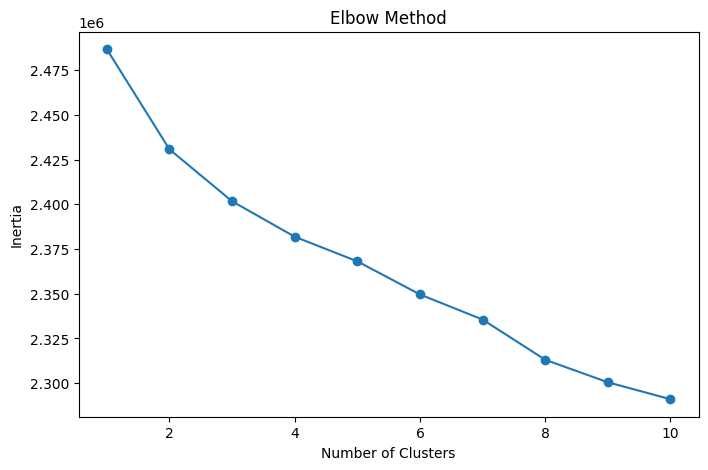

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for {k} clusters: {score}")


Silhouette Score for 2 clusters: 0.02484122885313159
Silhouette Score for 3 clusters: 0.011283048697559899
Silhouette Score for 4 clusters: 0.0030603034204128837
Silhouette Score for 5 clusters: 0.004134035018191443
Silhouette Score for 6 clusters: 0.00037021381244576457
Silhouette Score for 7 clusters: 0.004947533230094665
Silhouette Score for 8 clusters: 0.005791427762925613
Silhouette Score for 9 clusters: -0.0008782337652038244


In [24]:
from sklearn.metrics import silhouette_score

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 4: Add cluster labels to the DataFrame
df_cleaned_boy['Cluster'] = clusters

# Evaluate using Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score}")

# Step 5: Analyze cluster centers and sizes
print("Cluster Centers (Scaled):", kmeans.cluster_centers_)
print("Cluster Sizes:", pd.Series(clusters).value_counts())

/tmp/ipykernel_20304/3330126531.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned_boy['Cluster'] = clusters


Silhouette Score: 0.011562480929485508
Cluster Centers (Scaled): [[-2.65400521e-05  1.58137428e-01  5.02151125e-02 ...  3.14278230e-02
  -2.12985822e-02  4.40587604e-02]
 [ 3.20062996e-02 -7.82696131e-02  1.02799499e-01 ... -2.81172319e-02
  -1.15226651e-02 -1.97237803e-02]
 [-2.83342693e-02 -1.69610980e-02 -1.18451454e-01 ...  7.75577792e-03
   2.18272973e-02 -6.57047090e-03]]
Cluster Sizes: 2    2914
1    2581
0    1590
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

Z = linkage(scaled_data, method='ward') 

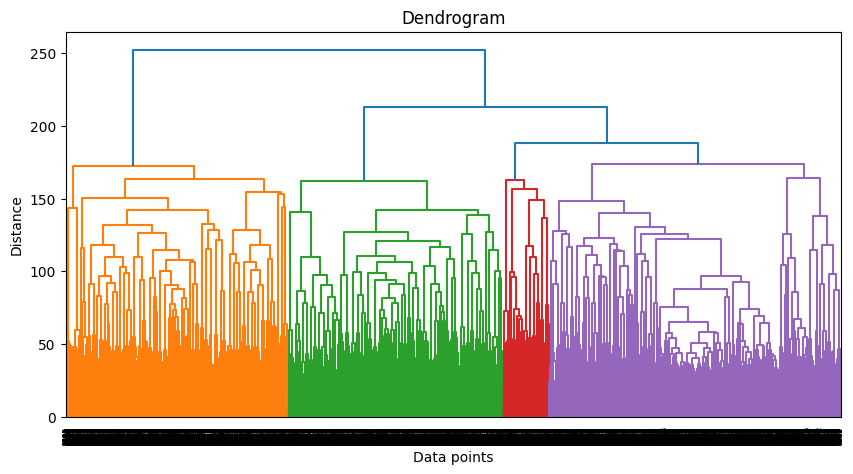

In [26]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


In [27]:
hc_model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # linkage method can be 'ward', 'complete', 'average', etc.
cluster_labels = hc_model.fit_predict(scaled_data)

In [28]:
cluster_labels

array([0, 2, 0, ..., 1, 0, 2])

In [29]:
sil_score = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: -0.010


In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Find the optimal eps using the k-distance plot
neighbors = NearestNeighbors(n_neighbors=5).fit(scaled_data)  # k=5 is a good starting point
distances, indices = neighbors.kneighbors(scaled_data)

# Sort distances and plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon (k-distance)")
plt.title("Optimal Epsilon using k-distance Plot")
plt.show()


In [35]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=15, min_samples=5)  # Adjust 'eps' and 'min_samples'
cluster_labels = dbscan.fit_predict(scaled_data)


In [ ]:
cluster_labels

In [36]:
# Count clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Evaluate clustering using silhouette score (ignoring noise points)
if n_clusters > 1:
    sil_score = silhouette_score(scaled_data, cluster_labels)
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette Score cannot be calculated for fewer than 2 clusters.")


Estimated number of clusters: 349
Estimated number of noise points: 2411
Silhouette Score: 0.104


Explained Variance Ratio: [0.03134627 0.02293329 0.01740347 0.01679236 0.01591337 0.01548025
 0.01422706 0.01386864 0.01271584 0.01234772 0.01192836 0.01108586
 0.01097082 0.0104138  0.00985209 0.00955616 0.00906668 0.00892166
 0.00876961 0.00860704 0.00852616 0.00814878 0.00803552 0.00790644
 0.0077207  0.00756047 0.00748879 0.00725288 0.00723334 0.00711153
 0.00706154 0.00683018 0.00675018 0.00659487 0.00652556 0.00640028
 0.00634843 0.00625543 0.00621127 0.00608182 0.00587056 0.00581065
 0.00572938 0.00564716 0.00555648 0.00552493 0.00545547 0.00537759
 0.00532772 0.00524759]
Total Variance Captured: 0.47


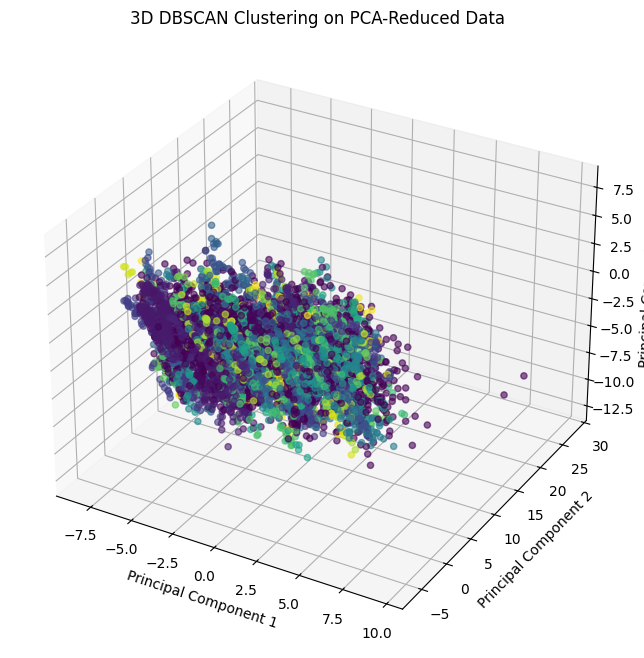

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=50)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(scaled_data)

# Explained variance ratio (to understand variance captured)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Captured: {sum(explained_variance):.2f}")

# Plot the reduced data
# Plot clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[:,0], reduced_data[:, 1], reduced_data[:, 2],
           c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)
ax.set_title("3D DBSCAN Clustering on PCA-Reduced Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()


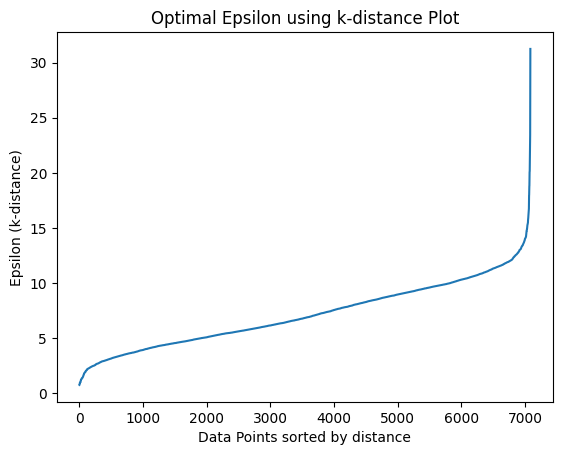

In [38]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Find the optimal eps using the k-distance plot
neighbors = NearestNeighbors(n_neighbors=5).fit(reduced_data)  # k=5 is a good starting point
distances, indices = neighbors.kneighbors(reduced_data)

# Sort distances and plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon (k-distance)")
plt.title("Optimal Epsilon using k-distance Plot")
plt.show()


In [39]:
dbscan = DBSCAN(eps=13, min_samples=5)  # Adjust 'eps' and 'min_samples'
cluster_labels = dbscan.fit_predict(reduced_data)

In [40]:
# Count clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Evaluate clustering using silhouette score (ignoring noise points)
if n_clusters > 1:
    sil_score = silhouette_score(scaled_data, cluster_labels)
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette Score cannot be calculated for fewer than 2 clusters.")


Estimated number of clusters: 7
Estimated number of noise points: 87
Silhouette Score: 0.104


In [43]:
np.unique(cluster_labels)



array([-1,  0,  1,  2,  3,  4,  5,  6])

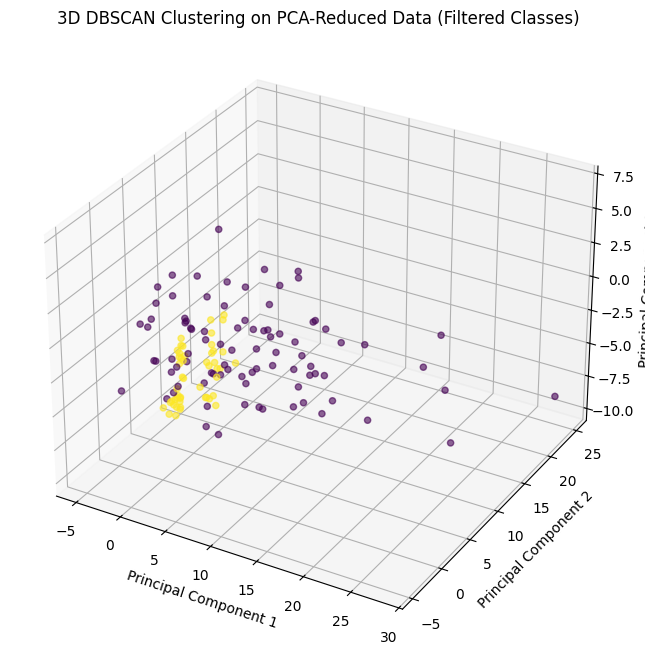

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the classes you want to visualize
class_a = -1  # Replace with the label of the first class
class_b = 4  # Replace with the label of the second class

# Filter the data to include only the specified classes
mask = np.isin(cluster_labels, [class_a, class_b])
filtered_data = reduced_data[mask]
filtered_labels = cluster_labels[mask]

# Plot the filtered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_data[:, 1], filtered_data[:, 3], filtered_data[:, 5],
                      c=filtered_labels, cmap='viridis', marker='o', alpha=0.6)

# Set axis labels
ax.set_title("3D DBSCAN Clustering on PCA-Reduced Data (Filtered Classes)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()


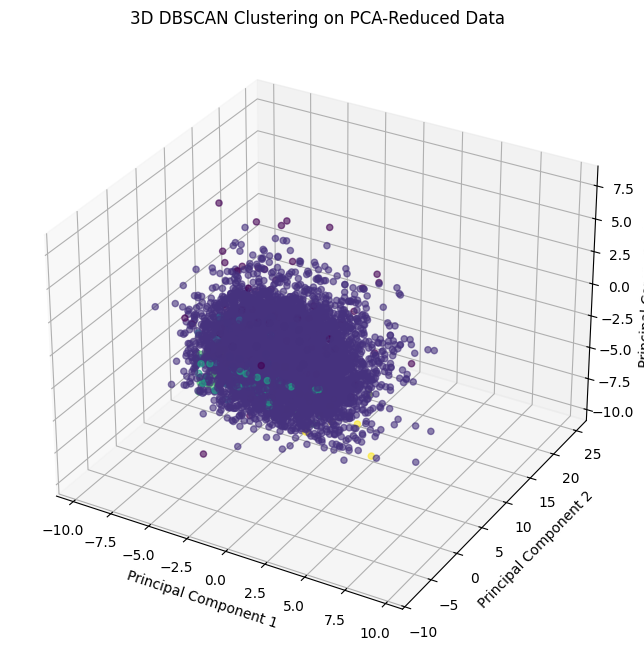

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:, 5], reduced_data[:, 3], reduced_data[:, 8],
           c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)

# Set axis labels
ax.set_title("3D DBSCAN Clustering on PCA-Reduced Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()


In [ ]:
def calculate_height_percentiles(df):
    def assign_label(percentile):
        if 3 <= percentile < 15:
            return "Short"
        elif 15 <= percentile <= 85:
            return "Normal"
        elif 85 < percentile <= 97:
            return "Tall"


    # Group by age and sex
    df["percentile"] = df.groupby(["age", "sex"])['height'].transform(lambda x: x.rank(pct=True) * 100)

    # Apply labels based on percentiles
    df["label"] = df["percentile"].apply(assign_label)

    return df